In [1]:
lko_lat = '26.8467'
lko_long = '80.949997'
print('the lat and long of lucknow are {},{}'.format(lko_lat,lko_long))


the lat and long of lucknow are 26.8467,80.949997


In [2]:
import folium
lko_map=folium.Map(location=[lko_lat,lko_long],zoom_start=13)
folium.Marker([lko_lat,lko_long]).add_to(lko_map)
lko_map.save("lko_map.html")
lko_map

In [7]:
FOURSQUARE_CLIENT_ID=''
FOURSQUARE_CLIENT_SECRET=''
RADIUS=10000
NO_OF_VENUES=100
VERSION='20200518'

In [8]:
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

In [9]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])


while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        lko_lat, 
                                                                        lko_long, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))
        

Total 66 venues fetched within a total radius of 10.0 Km

Total 66 venues fetched


C:\anaconda\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [10]:
headers={'user-key':''}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [13]:
lko_map = folium.Map(location = [lko_lat,lko_long], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(lko_map)  

lko_map.save("Venues by Foursquare.html")
lko_map

In [16]:
lko_map = folium.Map(location = [lko_lat, lko_long], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(lko_map)  

lko_map.save("Venues by Zomato.html")
lko_map

In [17]:

foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [19]:

dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [20]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,The Mughal's Dastarkhwan,Indian Restaurant,26.8442,80.9403,The Mughal's Dastarkhwan,26.8442,80.9403,800,3,4.5,"29, BN Road, Near Royal Hotel Crossing, Lalbag...",0.0000,0.0000
1,Royal Sky,Indian Restaurant,26.8502,80.9410,Royal Sky,26.8504,80.9411,1100,3,4.4,"31/039, GF - 3 (31/37), Mahatma Gandhi Marg, H...",0.0002,0.0001
2,Hazratganj | हज़रतगंज | حضرتگںج (Hazratganj),Neighborhood,26.8483,80.9448,Madras Restaurant,26.8484,80.9448,200,1,3.6,"Near Gandhi Ashram, Behind Amar Fax, Hazratgan...",0.0001,0.0000
3,Cappuccino Blast,Café,26.8337,80.9477,Cappuccino Blast,26.8337,80.9478,700,2,4.3,"12, Mall Avenue, Near, Hazratganj, Lucknow",0.0000,0.0001
4,Dastarkhwan,Indian Restaurant,26.8527,80.9369,Dastarkhwan,26.8526,80.9368,600,2,4.5,"20, Wala Qadar Road, DM Compound Colony, Kaise...",-0.0001,-0.0001
5,JJ Bakery,Bakery,26.8727,80.9411,La Reine,26.8726,80.9412,500,2,3.3,"Shop No 26 , Close to HDFC Bank ATM, Sinha Mar...",-0.0001,0.0001
6,Hotel Levana,Hotel,26.8475,80.9444,EOS Bar & Bistro- Hotel Levana,26.8474,80.9445,1500,4,4.2,"Hotel Levana, 3rd Floor, 72, MG Marg, Hazratga...",-0.0001,0.0001
7,Janpath Market,Shopping Mall,26.8468,80.9437,Quality Like Five Star,26.8469,80.9438,300,1,3.0,"A 21, Janpath Market, Off MG Marg, Lalbagh, Lu...",0.0001,0.0001
8,Royal Café,Indian Restaurant,26.8562,80.9453,Royal Hut,26.8560,80.9453,250,1,3.3,"9/7, Shahnajaf Road, Hazratganj, Lucknow",-0.0002,0.0000
9,Moti Mahal,Indian Restaurant,26.8474,80.9453,Moti Mahal Sweets,26.8472,80.9453,400,2,3.4,"75, Mahatma Gandhi Marg, Next To Central Bank ...",-0.0002,0.0000


In [21]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [22]:
selected_venues


,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Indian Restaurant,The Mughal's Dastarkhwan,26.8442,80.9403,3,4.5,"29, BN Road, Near Royal Hotel Crossing, Lalbag...",400.0
1,Indian Restaurant,Royal Sky,26.8504,80.9411,3,4.4,"31/039, GF - 3 (31/37), Mahatma Gandhi Marg, H...",550.0
2,Neighborhood,Madras Restaurant,26.8484,80.9448,1,3.6,"Near Gandhi Ashram, Behind Amar Fax, Hazratgan...",100.0
3,Café,Cappuccino Blast,26.8337,80.9478,2,4.3,"12, Mall Avenue, Near, Hazratganj, Lucknow",350.0
4,Indian Restaurant,Dastarkhwan,26.8526,80.9368,2,4.5,"20, Wala Qadar Road, DM Compound Colony, Kaise...",300.0
5,Bakery,La Reine,26.8726,80.9412,2,3.3,"Shop No 26 , Close to HDFC Bank ATM, Sinha Mar...",250.0
6,Hotel,EOS Bar & Bistro- Hotel Levana,26.8474,80.9445,4,4.2,"Hotel Levana, 3rd Floor, 72, MG Marg, Hazratga...",750.0
7,Shopping Mall,Quality Like Five Star,26.8469,80.9438,1,3.0,"A 21, Janpath Market, Off MG Marg, Lalbagh, Lu...",150.0
8,Indian Restaurant,Royal Hut,26.8560,80.9453,1,3.3,"9/7, Shahnajaf Road, Hazratganj, Lucknow",125.0
9,Indian Restaurant,Moti Mahal Sweets,26.8472,80.9453,2,3.4,"75, Mahatma Gandhi Marg, Next To Central Bank ...",200.0


In [23]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 37


<BarContainer object of 14 artists>

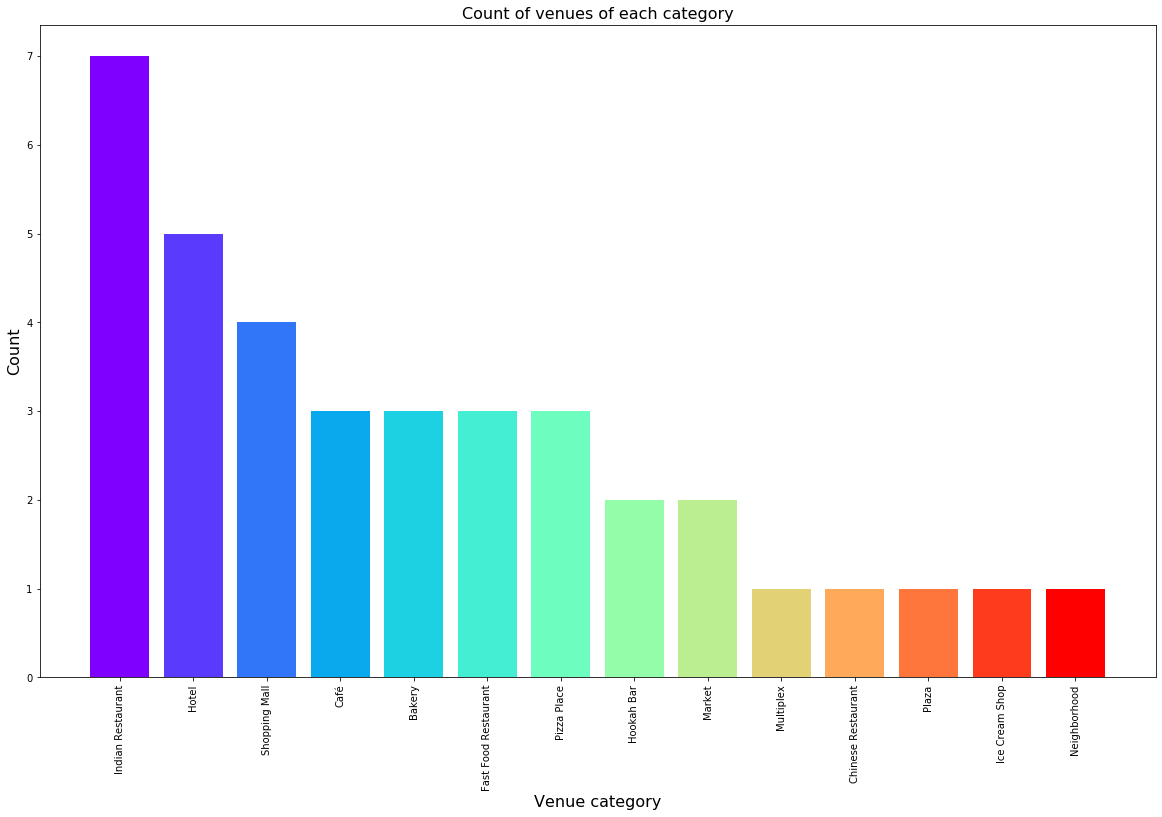

In [24]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Count of venues with given rating')

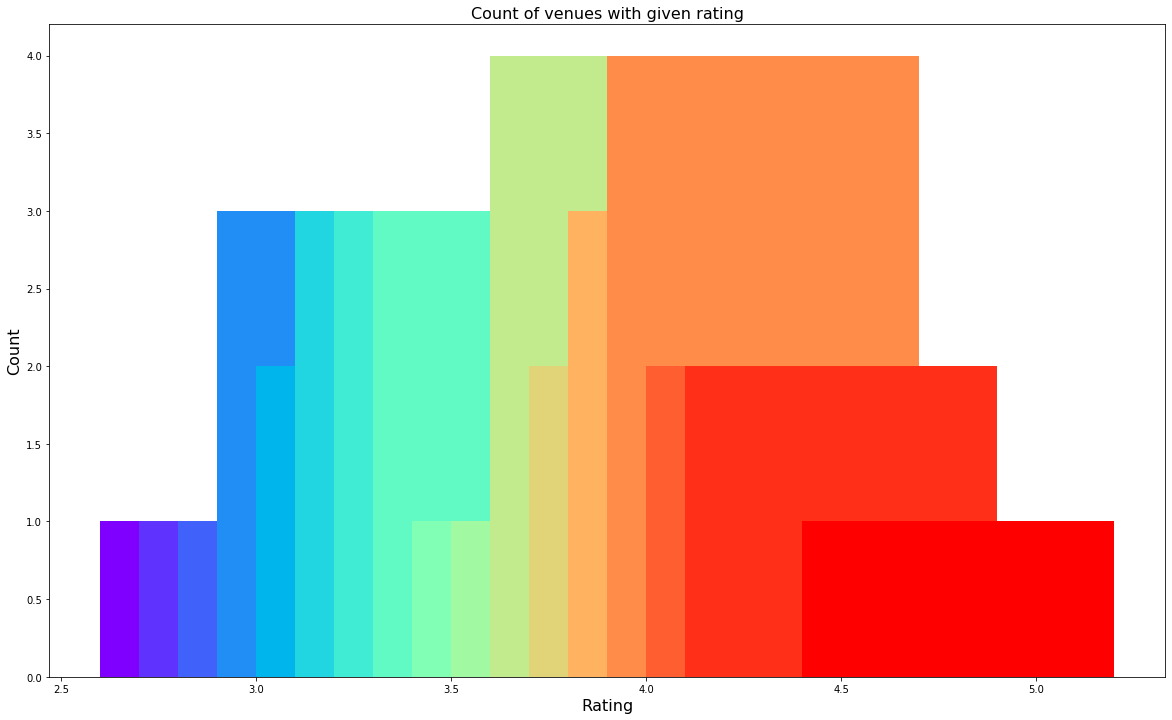

In [25]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

In [26]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

lko_map = folium.Map(location = [lko_lat, lko_long], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(lko_map)  

lko_map.save("Venues Ratings.html")
lko_map

Text(0.5, 1.0, 'Count of venues with given average price')

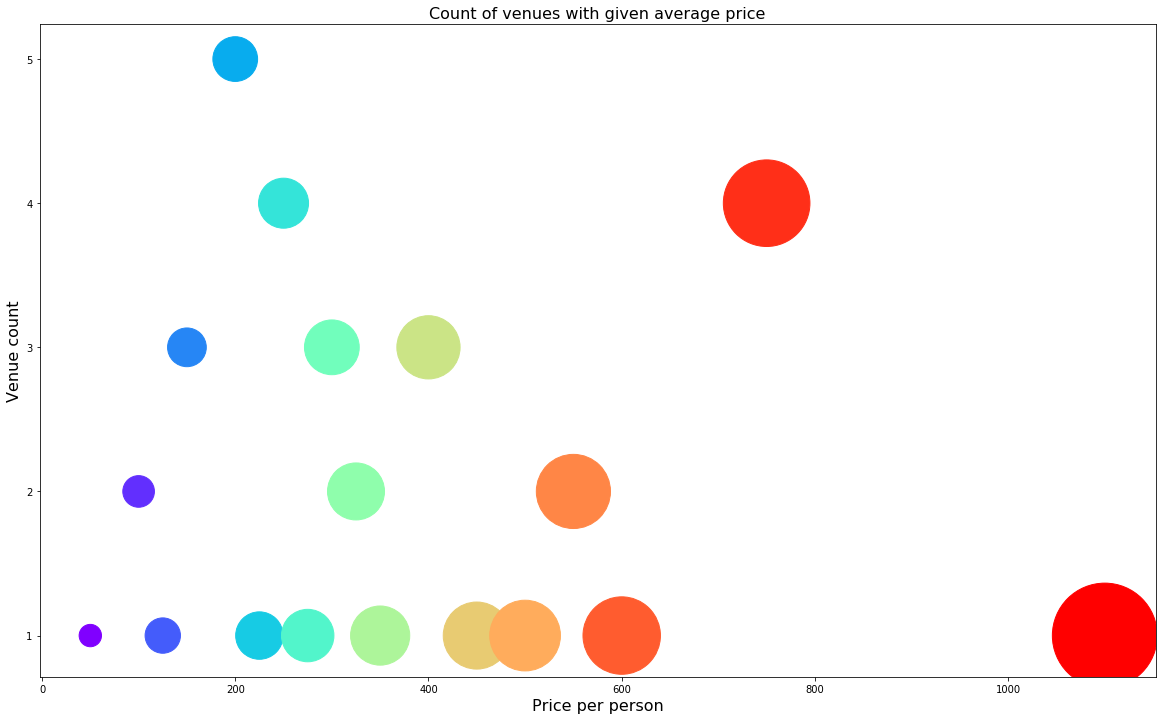

In [29]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

In [39]:
color_map = {'1': 'green', '2': 'darkgreen', '3': 'orange', '4': 'red'}

lko_map = folium.Map(location = [lko_lat, lko_long], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(lko_map)  

lko_map.save("Venues Prices.html")
lko_map

In [40]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Indian Restaurant,The Mughal's Dastarkhwan,26.8442,80.9403,3,4.5,"29, BN Road, Near Royal Hotel Crossing, Lalbag...",400.0,Very good
1,0,Indian Restaurant,Royal Sky,26.8504,80.9411,3,4.4,"31/039, GF - 3 (31/37), Mahatma Gandhi Marg, H...",550.0,Very good
2,1,Neighborhood,Madras Restaurant,26.8484,80.9448,1,3.6,"Near Gandhi Ashram, Behind Amar Fax, Hazratgan...",100.0,Good
3,1,Café,Cappuccino Blast,26.8337,80.9478,2,4.3,"12, Mall Avenue, Near, Hazratganj, Lucknow",350.0,Very good
4,1,Indian Restaurant,Dastarkhwan,26.8526,80.9368,2,4.5,"20, Wala Qadar Road, DM Compound Colony, Kaise...",300.0,Very good


In [43]:
lko_map = folium.Map(location = [lko_lat,lko_long], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(lko_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(lko_map)

lko_map.save("Venues Clusters.html")
lko_map

In [44]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Indian Restaurant,Royal Sky,26.8504,80.9411,3,4.4,"31/039, GF - 3 (31/37), Mahatma Gandhi Marg, H...",550.0,Very good
1,0,Hotel,EOS Bar & Bistro- Hotel Levana,26.8474,80.9445,4,4.2,"Hotel Levana, 3rd Floor, 72, MG Marg, Hazratga...",750.0,Very good
2,0,Hookah Bar,Blue The Lounge,26.8538,80.9453,3,3.5,"1A, Shravan Plaza Complex, Sapru Marg, Hazratg...",500.0,Good
3,0,Shopping Mall,Ttamaasha Bistro Bar,26.8701,80.9971,4,4.0,"Wave Mall, 4th Floor, Gomti Nagar, Lucknow",1100.0,Good
4,0,Hotel,Azure - Casaya Inn,26.8532,81.0263,4,3.5,"CP - 128, Casaya Inn, Opposite Door Darshan Co...",750.0,Good
5,0,Hookah Bar,Mint Lounge - Hotel Arif Castles,26.8572,80.9431,3,4.0,"Hotel Arif Castles, 4, Rana Pratap Marg, Hazra...",600.0,Good
6,0,Chinese Restaurant,Mainland China,26.8530,80.9731,4,4.3,"3rd Floor, Riverside Mall, Vipin Khand, Gomti ...",750.0,Very good
7,0,Hotel,Kava Restaurant - Fairfield by Marriott,26.8678,81.0095,4,4.0,"Gate 2, Opposite Indra Gandhi Prathishthan, Vi...",750.0,Good
8,0,Hotel,Urban Terrace,26.8519,81.0233,3,4.1,"Hotel Lineage CP-73, Viraj Khand,Gomtinagar,Ne...",550.0,Very good


In [46]:
of {0:.02f} and rating spread around {0:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

SyntaxError: invalid syntax (<ipython-input-46-2d7a6cc1abfa>, line 1)